# PCA on $R_s$

In [3]:
# imports
from importlib import reload
import numpy as np
import pandas
import datetime

from matplotlib import pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy

import seaborn as sns

from oceancolor.ihop import io as ihop_io

from sklearn import decomposition

In [2]:
%matplotlib ipympl

# Load up L23

In [5]:
ab, Rs, d_a, d_bb = ihop_io.load_loisel_2023_pca()

In [6]:
Rs.shape

(3320, 81)

In [15]:
wave = d_a['wavelength']

In [14]:
list(d_a.keys())

['Y', 'data', 'M', 'mean', 'explained_variance', 'Rs', 'wavelength']

# Full PCA

In [7]:
pca_fit = decomposition.PCA(n_components=Rs.shape[1]).fit(Rs)

## Plot

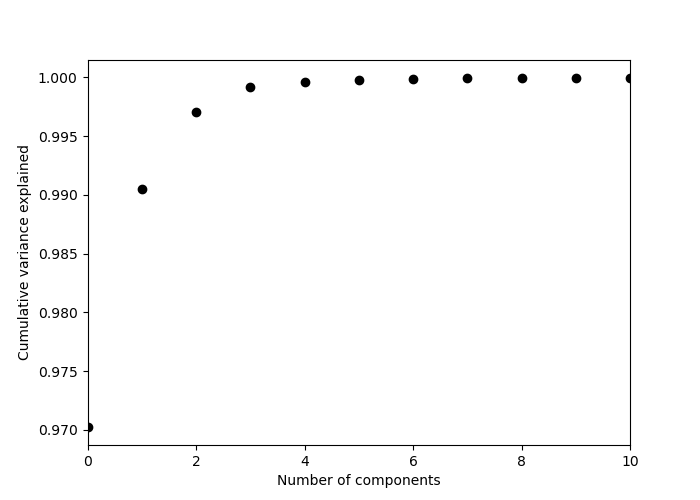

In [12]:
fig = plt.figure(figsize=(7,5))
plt.clf()
ax = plt.gca()
ax.plot(np.cumsum(pca_fit.explained_variance_ratio_), 'ok')
# Label
ax.set_ylabel('Cumulative variance explained')
ax.set_xlabel('Number of components')
#
ax.set_xlim(0,10.)
#
plt.show()

# 3 component

In [9]:
pca_fit3 = decomposition.PCA(n_components=3).fit(Rs)

## Mean

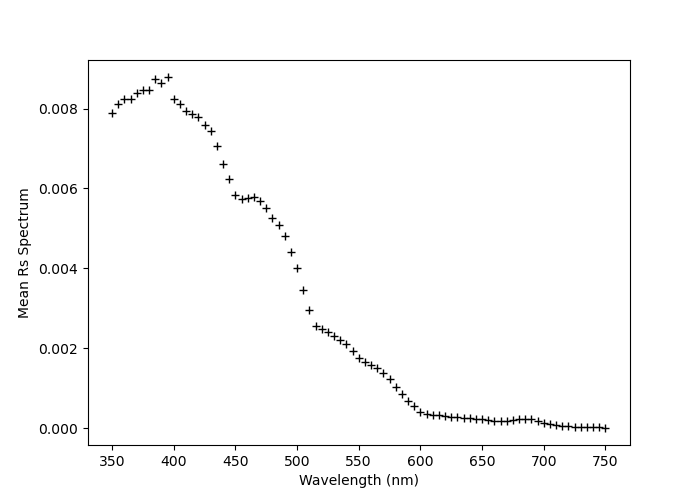

In [19]:
fig = plt.figure(figsize=(7,5))
plt.clf()
ax = plt.gca()
ax.plot(wave, pca_fit3.mean_, 'k+')
# Label
ax.set_ylabel('Mean Rs Spectrum')
ax.set_xlabel('Wavelength (nm)')
#
#ax.set_xlim(0,10.)
#
plt.show()

## Eigenvectors

In [20]:
M = pca_fit3.components_

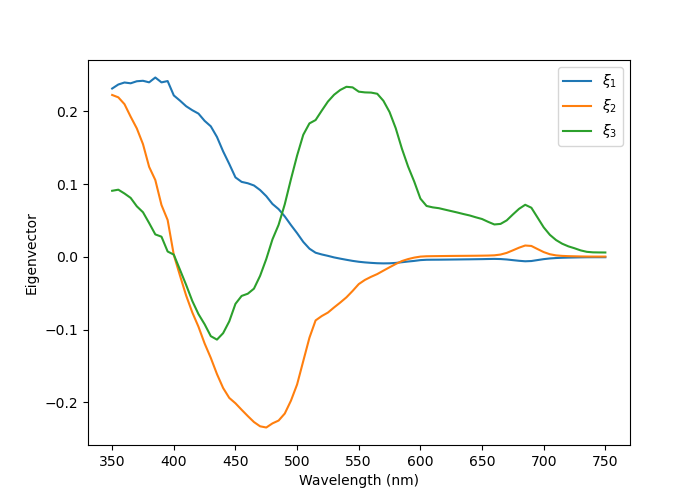

In [21]:
fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()
ax.plot(wave,M[0], label=r'$\xi_1$')
ax.plot(wave,M[1], label=r'$\xi_2$')
ax.plot(wave,M[2], label=r'$\xi_3$')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Eigenvector')
ax.legend()
#
plt.show()